<a href="https://colab.research.google.com/github/clarawajdenbaum/sales-predictions/blob/main/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Project/sales_predictions.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [59]:
# Important codes from part 5

y = df['Item_Outlet_Sales'] 
X = df.drop(columns='Item_Outlet_Sales')
replacement_dict = {'High':2, 'Medium':1, 'Small':0}
df['Outlet_Size'].replace(replacement_dict, inplace=True)
df['Outlet_Size'].value_counts()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')  
const_imputer = SimpleImputer(strategy='constant')
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
num_pipe = make_pipeline(mean_imputer, scaler)
cat_pipe = make_pipeline(const_imputer, ohe)
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
preprocessor = make_column_transformer(num_tuple, cat_tuple)
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
# Our task here is to build different models and see how well they work.

Linear Regression Model

In [6]:
# Import the model

from sklearn.linear_model import LinearRegression

In [7]:
# Make an instance of the model

reg = LinearRegression()

In [21]:
# Training the model on the data

reg.fit(X_train_processed, y_train)

LinearRegression()

In [12]:
# Measuring model performance using R^2

train_score = reg.score(X_train_processed, y_train)
test_score = reg.score(X_test_processed, y_test)
print(train_score)
print(test_score)

0.6664056642852452
-5.828794128456094e+18


In [42]:
# Obtaining the predictions (in order to calculate RMSE)

train_preds = reg.predict(X_train_processed)
test_preds = reg.predict(X_test_processed)

# Coefficient of Determination (r^2) (to find the RMSE)
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [44]:
# Calculatin the root mean squared error (RMSE)

rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
print(rmse_train)
print(rmse_test)

993.6084036625189
4010175883388.551


In [ ]:
# The linear regression model is absolutely not a model that fits our data. 
# The r^2 score is negative meaning that our model fits worse than a horizontal line. Source: https://stats.stackexchange.com/questions/12900/when-is-r-squared-negative

Regression Tree Model

In [14]:
# Import the model

from sklearn.tree import DecisionTreeRegressor

In [22]:
# Make an instance of the model

dec_tree = DecisionTreeRegressor(random_state=42)

In [23]:
# Training the model on the data

dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [52]:
# Measuring model performance using R^2

train_score_dt = dec_tree.score(X_train_processed, y_train)
test_score_dt = dec_tree.score(X_test_processed, y_test)
print(train_score_dt)
print(test_score_dt)

# Our model is very overfit so I am going to change the max depth.

0.9999999425876854
0.22256706036110852


In [28]:
# Tune the Model

dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [29]:
# Lets check and see what the depth of our default tree was.

dec_tree.get_depth()

81

In [30]:
# Let's see how many leaf nodes our tree had.

dec_tree.get_n_leaves()

6263

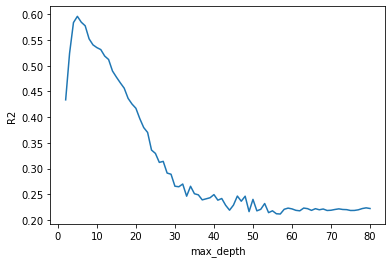

In [35]:
# Let's write a function to find out perfect max depth

max_depth_range = list(range(2,81))
r2 = []
for depth in max_depth_range:
  dec_tree = DecisionTreeRegressor(max_depth =depth, random_state = 42)
  dec_tree.fit(X_train_processed, y_train)
  score = dec_tree.score(X_test_processed, y_test)
  r2.append(score)

plt.plot(max_depth_range, r2);
plt.xlabel('max_depth');
plt.ylabel('R2');

In [38]:
dec_tree_7 = DecisionTreeRegressor(max_depth=7, random_state=42)
dec_tree_7.fit(X_train_processed, y_train)
train_7_score = dec_tree_7.score(X_train_processed, y_train)
test_7_score = dec_tree_7.score(X_test_processed, y_test)
print(train_7_score)
print(test_7_score)

0.6293104944684149
0.5777074810611029


In [ ]:
# With a max depth of 7, our model has low variance. The variance is how much the model will vary if we use different datasets. Source: https://login.codingdojo.com/m/213/7197/85745
# We have a r^2 score of 0.57 on the testing data which is considered a moderate correlation. Source: https://www.rampfesthudson.com/what-does-an-r2-value-of-0-6-mean/

In [62]:
dec_tree_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
dec_tree_2.fit(X_train_processed, y_train)
train_2_score = dec_tree_2.score(X_train_processed, y_train)
test_2_score = dec_tree_2.score(X_test_processed, y_test)
print(train_2_score)
print(test_2_score)

0.43164096170474664
0.4337775044707164


In [ ]:
# With a depth of 2, our model fits perfectly. But a r^2 score of 0.43 is considered low.

In [48]:
# Obtaining the predictions (in order to calculate RMSE)

train_preds_dt = dec_tree.predict(X_train_processed)
test_preds_dt = dec_tree.predict(X_test_processed)

# Coefficient of Determination (r^2) (to find the RMSE)
r2_train_dt = r2_score(y_train, train_preds_dt)
r2_test_dt = r2_score(y_test, test_preds_dt)

In [49]:
# Calculatin the root mean squared error (RMSE)

rmse_train_dt = np.sqrt(mean_squared_error(y_train, train_preds_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, test_preds_dt))
print(rmse_train_dt)
print(rmse_test_dt)

0.4122004388823073
1464.5544794429682


In [57]:
# Normalized RMSE

# formula: Normalized RMSE = RMSE / (max value – min value) # Source: https://www.statology.org/what-is-a-good-rmse/
1464.5544794429682/(13086.964800 - 33.290000)

0.11219480352329356

In [ ]:
# rmse of train: 0.4
# rmse of test: 0.1 
# There is a big difference between our two rmse meaning that our model is underfitting our data.
# The causes could be that we don't have enought data or that our features do not correlate well with the target. Source: https://login.codingdojo.com/m/213/7197/85745

**Conclusion**


The linear regression model doesn't work at all on our dataset as we have a negative r^2 score on the testing sets. 

I would recommend a regression tree model with a max_depth of 7.
This model has a low variance and a moderate r^2 score. 
The RMSE of this model on the testing set is of 0.11 which is very low. The lowest it is, the best, as it means that we have a small margin of errors.
